#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Import Data

In [2]:
df = (pd
      .DataFrame([
                    {"app": "A", "bid_price": 0.01, "win": 0, "events": 100000}, 
                    {"app": "A", "bid_price": 0.01, "win": 1, "events": 0}, 
                    {"app": "A", "bid_price": 0.1, "win": 0, "events": 7000}, 
                    {"app": "A", "bid_price": 0.1, "win": 1, "events": 3000}, 
                    {"app": "A", "bid_price": 0.2, "win": 0, "events": 8000000}, 
                    {"app": "A", "bid_price": 0.2, "win": 1, "events": 2000000}, 
                    {"app": "A", "bid_price": 0.4, "win": 0, "events": 700000}, 
                    {"app": "A", "bid_price": 0.4, "win": 1, "events": 300000}, 
                    {"app": "A", "bid_price": 0.5, "win": 0, "events": 80000}, 
                    {"app": "A", "bid_price": 0.5, "win": 1, "events": 20000}, 
                    {"app": "A", "bid_price": 0.75, "win": 0, "events": 7000}, 
                    {"app": "A", "bid_price": 0.75, "win": 1, "events": 3000}, 
                    {"app": "A", "bid_price": 1, "win": 0, "events": 400}, 
                    {"app": "A", "bid_price": 1, "win": 1, "events": 600}, 
                    {"app": "A", "bid_price": 2, "win": 0, "events": 30}, 
                    {"app": "A", "bid_price": 2, "win": 1, "events": 70}, 
                    {"app": "A", "bid_price": 5, "win": 0, "events": 2}, 
                    {"app": "A", "bid_price": 5, "win": 1, "events": 8}, 
                    {"app": "A", "bid_price": 9, "win": 0, "events": 0}, 
                    {"app": "A", "bid_price": 9, "win": 1, "events": 1}
                ])
       )

print('Data Sizes: ', df.shape)
print(df.info())

Data Sizes:  (20, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   app        20 non-null     object 
 1   bid_price  20 non-null     float64
 2   win        20 non-null     int64  
 3   events     20 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 768.0+ bytes
None


The data doesn't include null values and data types seem correct.

#### Data Analysis

In [3]:
df.describe()

,bid_price,win,events
count,20.000000,20.000000,2.000000e+01
mean,1.896000,0.500000,5.610556e+05
std,2.829812,0.512989,1.810805e+06
min,0.010000,0.000000,0.000000e+00
25%,0.200000,0.000000,2.450000e+01
50%,0.625000,0.500000,3.000000e+03
75%,2.000000,1.000000,8.500000e+04
max,9.000000,1.000000,8.000000e+06


- There is only one app which is A.
- The 'bid_price' column has 10 different pricess which are more than 0.
- The maximum event is 8000000 which belongs to 0.2 in bid_price.

#### Problem-1

In the first problem, the win_rate is calculated according to the 'app' and the 'bid_price'.

The formula is: 

$$
\ winRate = \frac {nofSuccessfullEvents} {nofTotalEvents}
$$

In [4]:
def calculateWinRate(data):
    """
    This function is created to calculate the win rate accoording to the 'app' and the 'bid_price'
    """
    dataWinRate = (pd
                   .DataFrame(data[data['win'] == 1]
                              .groupby(['app', 'bid_price'])['events']
                              .sum() / 
                              data
                              .groupby(['app', 'bid_price'])['events']
                              .sum()
                             ).reset_index()
                              .rename(columns = {'events': 'win_rate'})
                   
                  )
    return dataWinRate

In [5]:
# run the plotPricalculateWinRateceRate function to calculate the win rate
dfWinRate = calculateWinRate(df)
dfWinRate

,app,bid_price,win_rate
0,A,0.01,0.0
1,A,0.10,0.3
2,A,0.20,0.2
3,A,0.40,0.3
4,A,0.50,0.2
5,A,0.75,0.3
6,A,1.00,0.6
7,A,2.00,0.7
8,A,5.00,0.8
9,A,9.00,1.0


In [6]:
def plotPriceRate(data):
    """
    This function is created to plot the win rate the bid_price graph to see the relation
    """
    plt.figure(figsize = (25,7))
    plt.plot(data.bid_price, data.win_rate, color = 'purple', linewidth=4, marker = 'o', markersize = 10, markerfacecolor ='yellow')
    plt.xlabel("Bid Price", fontsize=18)
    plt.ylabel("Win Rate", fontsize=18)
    plt.xticks(np.append(np.arange(0,1,0.1),  np.arange(1,10)), fontsize=17, rotation=90)
    plt.yticks(fontsize=17)
    plt.title("The Bid Price and The Win Rate", fontsize=20)

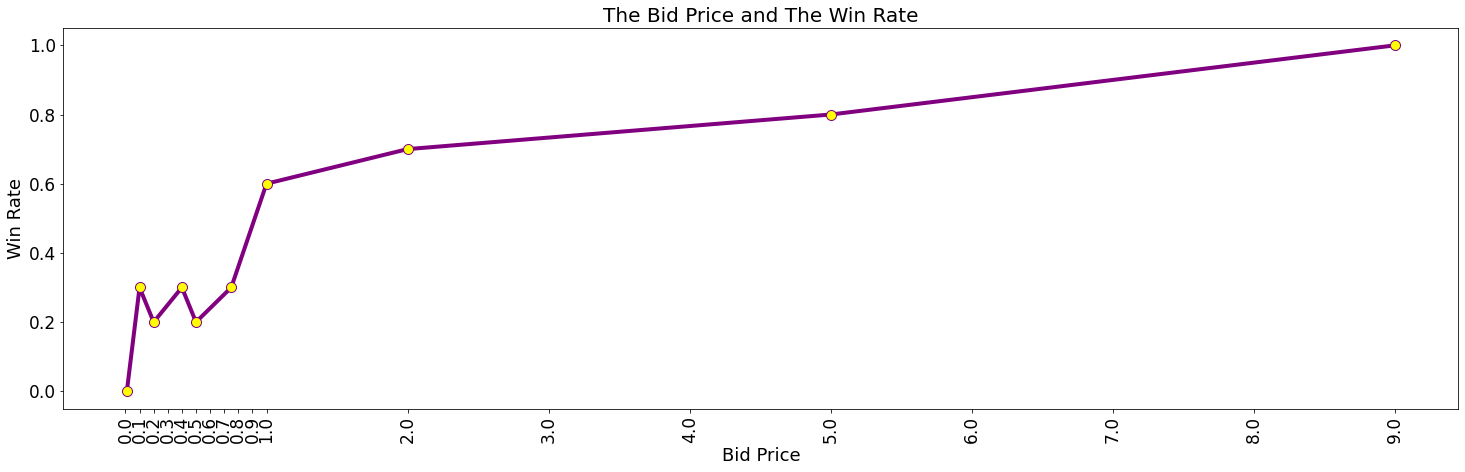

In [7]:
# run the plotPriceRate function to plot the relation
plotPriceRate(data = dfWinRate)

#### Problem-2

In the second problem, the revenue is calculated according to the below formula:


$$
\ revenue = (revenuePerWin - bidPrice) * \frac {eventForWin1} {totalEvent} * totalEvent
$$

In [8]:
def calculateRevenue(data, revenuePerWin = 0.5):
    """
    This function is created to calculate revenue column based on the given information
    """
    dfRevenue = pd.DataFrame()

    for i in range(0, data.shape[0]):
        # create variables to calculate revenue
        revenuePerWin = revenuePerWin
        bidPrice = data.iloc[i,1]
        eventForWin1 = data[data['win'] ==1].groupby(['bid_price'])['events'].sum()[bidPrice]
        totalEvent = data.groupby(['bid_price'])['events'].sum()[bidPrice]

        # calculate net revenue according to above values
        # (eventForWin1 / totalEvent) this is the winRate same results in Problem1
        revenue = (revenuePerWin - bidPrice) * (eventForWin1 / totalEvent) * totalEvent

        temp = pd.DataFrame(
            [{
                'bidPrice': bidPrice,
                'totalEvent': totalEvent,
                'revenue': revenue
            }]
        )
        # collect calculated variables in one dF
        dfRevenue = (pd
                     .concat([dfRevenue, temp])
                     .drop_duplicates()
                     .sort_values(by=['revenue'], ascending = False)
                    )
        dfRevenue.reset_index(drop=True, inplace=True)
        
    return dfRevenue

In [9]:
# run the calculateRevenue function to observe the max revenue for bidprice
dfRevenue = calculateRevenue(data = df, revenuePerWin = 0.5)
dfRevenue

,bidPrice,totalEvent,revenue
0,0.20,10000000,600000.0
1,0.40,1000000,30000.0
2,0.10,10000,1200.0
3,0.01,100000,0.0
4,0.50,100000,0.0
5,9.00,1,-8.5
6,5.00,10,-36.0
7,2.00,100,-105.0
8,1.00,1000,-300.0
9,0.75,10000,-750.0


The first row shows the max revenue with max event min bid_price. That will give us the optimum number for bid_price to earn max revenue

So, the optimum number for bid_price is 0.20

The revenue 600000.0